<a href="https://colab.research.google.com/github/Guru2308/ML-Certification/blob/main/Regression/Support_Vector_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv('/content/Position_Salaries.csv')

In [57]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [58]:
y = y.reshape(len(y),1)

In [59]:
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
scy = StandardScaler()
X = scx.fit_transform(X)
y = scy.fit_transform(y)

In [60]:
print(X)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [61]:
from sklearn.svm import SVR
reg = SVR(kernel='rbf')
reg.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [62]:
scy.inverse_transform(reg.predict(scx.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

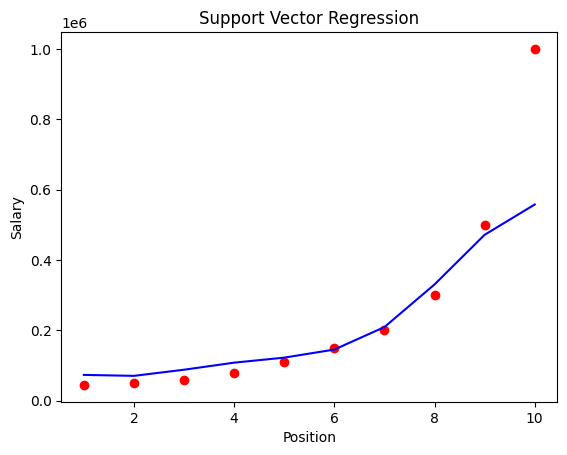

In [63]:
plt.scatter(scx.inverse_transform(X), scy.inverse_transform(y), color='red')
plt.plot(scx.inverse_transform(X), scy.inverse_transform(reg.predict(X).reshape(-1,1)), color='blue')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.title('Support Vector Regression')
plt.show()

<ipython-input-65-3dd6fefc1be0>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)  # keep in scaled range


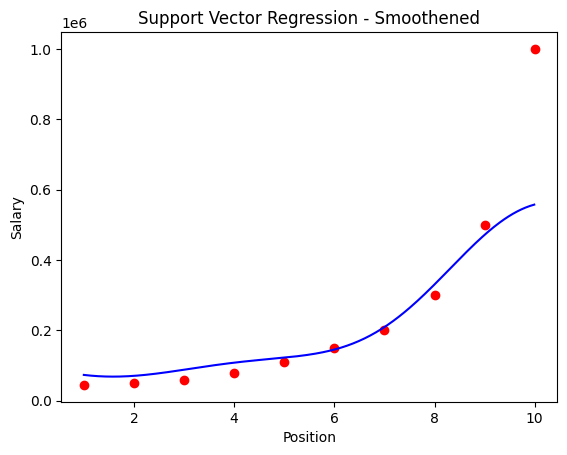

In [65]:
X_grid = np.arange(min(X), max(X), 0.01)  # keep in scaled range
X_grid = X_grid.reshape(-1, 1)

# Predict on the grid using the scaled model
y_pred_scaled = reg.predict(X_grid).reshape(-1, 1)

# Inverse transform to get back to original salary values
y_pred = scy.inverse_transform(y_pred_scaled)

# Plotting
plt.scatter(scx.inverse_transform(X), scy.inverse_transform(y), color='red')  # real data
plt.plot(scx.inverse_transform(X_grid), y_pred, color='blue')  # prediction line
plt.xlabel('Position')
plt.ylabel('Salary')
plt.title('Support Vector Regression - Smoothened')
plt.show()